In [2]:
!pip install lz4

     |████████████████████████████████| 1.8 MB 5.2 MB/s 


In [3]:
import os
import lz4
import matplotlib.pylab as plt
from io import BytesIO
import pandas as pd
import seaborn as sns


In [4]:
bytes_data=None
chunk_list=[]
from lz4 import frame

with frame.open('train.lz4', mode='r') as fp:
  chunk_size=1024*28*28
  output_data = fp.read(size=chunk_size)
  df_chunk=pd.read_csv(BytesIO(output_data))
  chunk_list.append(df_chunk)

df_test_concat = pd.concat(chunk_list)


In [5]:
df=df_test_concat


In [6]:
df.head()


,dataset_type,demand,departure_date,destination_current_public_holiday,destination_current_school_holiday,destination_days_to_next_public_holiday,destination_days_to_next_school_holiday,destination_station_name,od_destination_time,od_number_of_similar_12_hours,od_number_of_similar_2_hours,od_number_of_similar_4_hours,od_origin_month,od_origin_time,od_origin_week,od_origin_weekday,od_origin_year,od_travel_time_minutes,origin_current_public_holiday,origin_current_school_holiday,origin_days_to_next_public_holiday,origin_days_to_next_school_holiday,origin_station_name,price,sale_date,sale_day,sale_day_x,sale_month,sale_week,sale_weekday,sale_year
0,training,1,2019-03-01,0,1,52,-13,ag,1088,5,1,2,3,922,9,4,2019,166,0,1,52,-6,cpe,26.65,2018-12-02,2,-89.0,12.0,6.0,6.0,2018.0
1,training,6,2019-03-01,0,1,52,-13,ag,1088,5,1,2,3,922,9,4,2019,166,0,1,52,-6,cpe,26.65,2018-12-03,3,-88.0,12.0,0.0,0.0,2018.0
2,training,5,2019-03-01,0,1,52,-13,ag,1088,5,1,2,3,922,9,4,2019,166,0,1,52,-6,cpe,26.65,2018-12-04,4,-87.0,12.0,1.0,1.0,2018.0
3,training,0,2019-03-01,0,1,52,-13,ag,1088,5,1,2,3,922,9,4,2019,166,0,1,52,-6,cpe,26.65,2018-12-05,5,-86.0,12.0,2.0,2.0,2018.0
4,training,0,2019-03-01,0,1,52,-13,ag,1088,5,1,2,3,922,9,4,2019,166,0,1,52,-6,cpe,26.65,2018-12-06,6,-85.0,12.0,3.0,3.0,2018.0


In [7]:
df.describe


<bound method NDFrame.describe of      dataset_type  demand departure_date  ...  sale_week  sale_weekday  sale_year
0        training       1     2019-03-01  ...        6.0           6.0     2018.0
1        training       6     2019-03-01  ...        0.0           0.0     2018.0
2        training       5     2019-03-01  ...        1.0           1.0     2018.0
3        training       0     2019-03-01  ...        2.0           2.0     2018.0
4        training       0     2019-03-01  ...        3.0           3.0     2018.0
...           ...     ...            ...  ...        ...           ...        ...
7000     training       4     2019-03-05  ...        0.0           0.0     2019.0
7001     training      15     2019-03-05  ...        1.0           1.0     2019.0
7002     training       9     2019-03-05  ...        3.0           3.0     2019.0
7003     training       2     2019-03-05  ...        4.0           4.0     2019.0
7004     training       7     2019-03-05  ...        NaN        

In [8]:
df.dtypes

dataset_type                                object
demand                                       int64
departure_date                              object
destination_current_public_holiday           int64
destination_current_school_holiday           int64
destination_days_to_next_public_holiday      int64
destination_days_to_next_school_holiday      int64
destination_station_name                    object
od_destination_time                          int64
od_number_of_similar_12_hours                int64
od_number_of_similar_2_hours                 int64
od_number_of_similar_4_hours                 int64
od_origin_month                              int64
od_origin_time                               int64
od_origin_week                               int64
od_origin_weekday                            int64
od_origin_year                               int64
od_travel_time_minutes                       int64
origin_current_public_holiday                int64
origin_current_school_holiday  

In [9]:
filter=df['dataset_type']=='training'
  
# filtering data
df.where(filter).count()


dataset_type                               7005
demand                                     7005
departure_date                             7005
destination_current_public_holiday         7005
destination_current_school_holiday         7005
destination_days_to_next_public_holiday    7005
destination_days_to_next_school_holiday    7005
destination_station_name                   7005
od_destination_time                        7005
od_number_of_similar_12_hours              7005
od_number_of_similar_2_hours               7005
od_number_of_similar_4_hours               7005
od_origin_month                            7005
od_origin_time                             7005
od_origin_week                             7005
od_origin_weekday                          7005
od_origin_year                             7005
od_travel_time_minutes                     7005
origin_current_public_holiday              7005
origin_current_school_holiday              7005
origin_days_to_next_public_holiday      

In [10]:
df.isnull().sum()


dataset_type                               0
demand                                     0
departure_date                             0
destination_current_public_holiday         0
destination_current_school_holiday         0
destination_days_to_next_public_holiday    0
destination_days_to_next_school_holiday    0
destination_station_name                   0
od_destination_time                        0
od_number_of_similar_12_hours              0
od_number_of_similar_2_hours               0
od_number_of_similar_4_hours               0
od_origin_month                            0
od_origin_time                             0
od_origin_week                             0
od_origin_weekday                          0
od_origin_year                             0
od_travel_time_minutes                     0
origin_current_public_holiday              0
origin_current_school_holiday              0
origin_days_to_next_public_holiday         0
origin_days_to_next_school_holiday         0
origin_sta

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


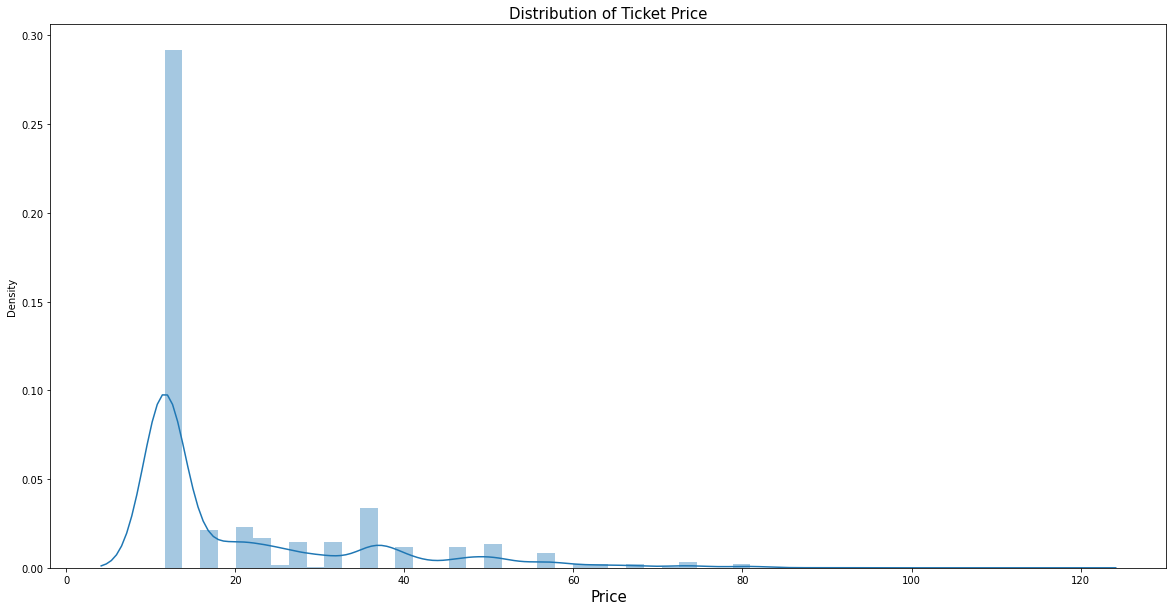

In [11]:
plt.figure(figsize=(20, 10))
sns.distplot(a=df['price'])
plt.xlabel('Price', fontsize=15)
plt.title('Distribution of Ticket Price', fontsize=15)

plt.show()

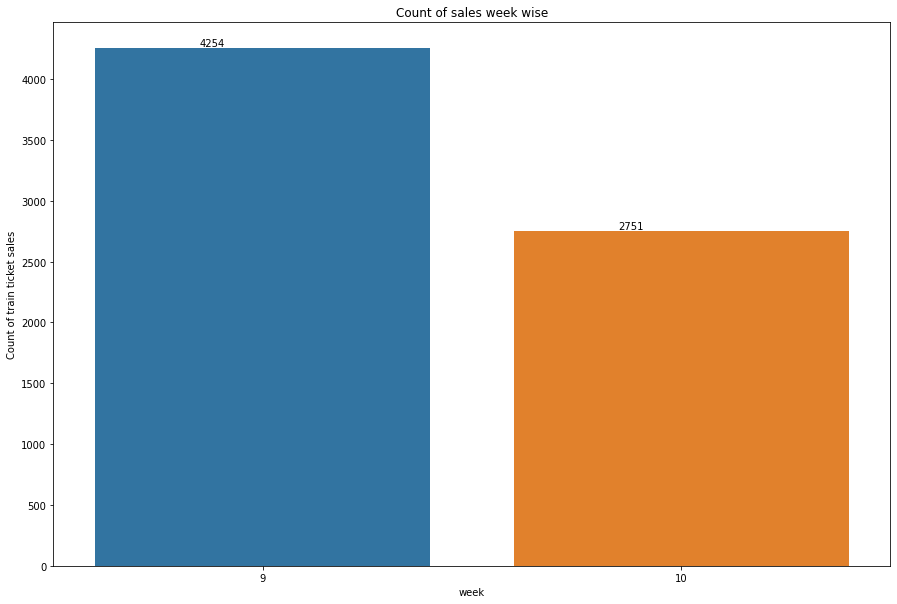

In [12]:
plt.figure(figsize = (15, 10))
plt.title('Count of sales week wise')
ax=sns.countplot(x = 'od_origin_week', data = df)
plt.xlabel('week')
plt.ylabel('Count of train ticket sales')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

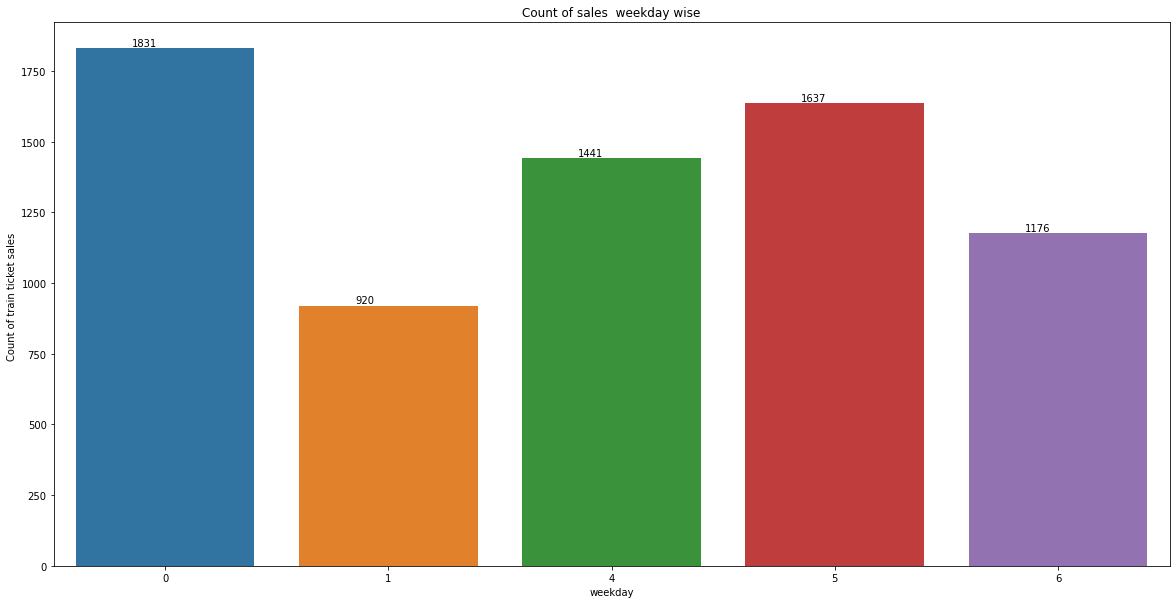

In [13]:
plt.figure(figsize = (20, 10))
plt.title('Count of sales  weekday wise')
ax=sns.countplot(x = 'od_origin_weekday', data = df)
plt.xlabel('weekday')
plt.ylabel('Count of train ticket sales ')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

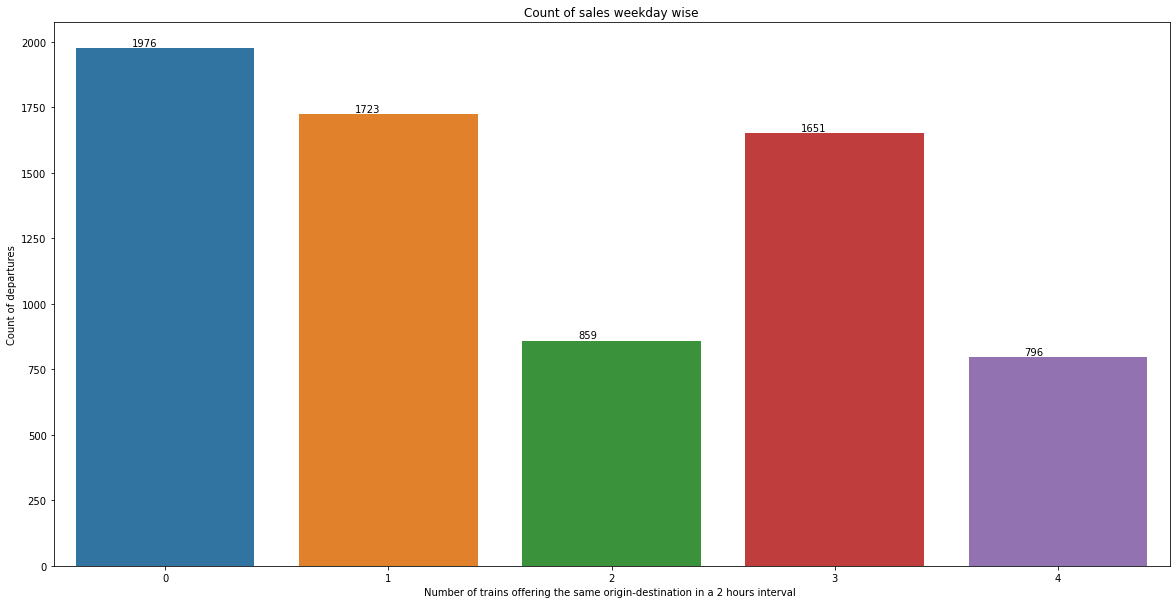

In [14]:
plt.figure(figsize = (20, 10))
plt.title('Count of sales weekday wise')
ax=sns.countplot(x = 'od_number_of_similar_2_hours', data = df)
plt.xlabel('Number of trains offering the same origin-destination in a 2 hours interval ')
plt.ylabel('Count of departures')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

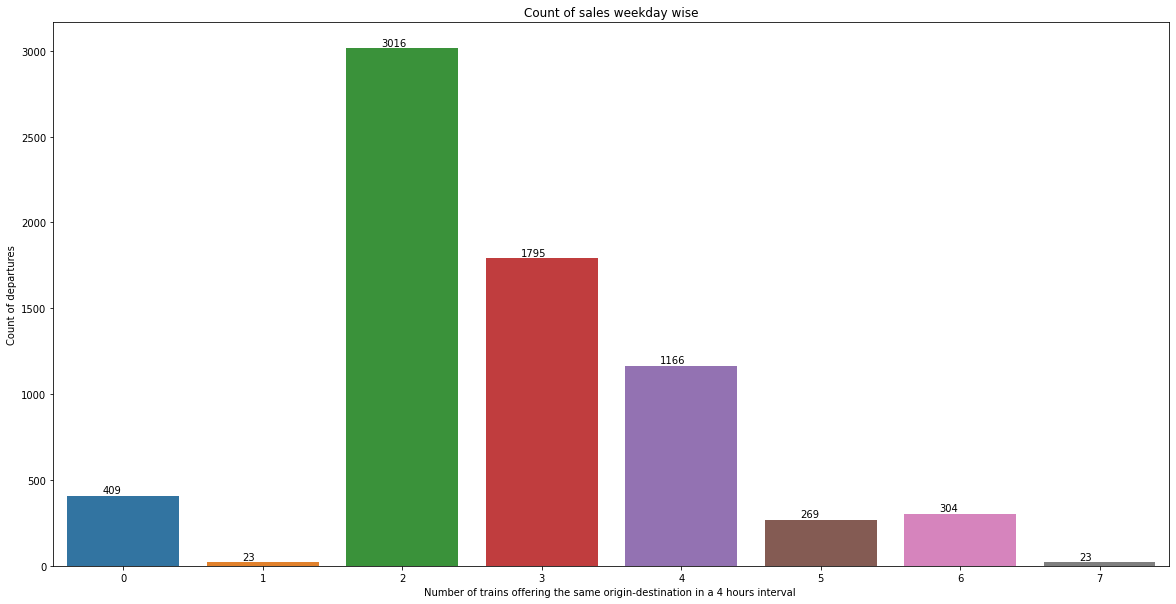

In [15]:
plt.figure(figsize = (20, 10))
plt.title('Count of sales weekday wise')
ax=sns.countplot(x = 'od_number_of_similar_4_hours', data = df)
plt.xlabel('Number of trains offering the same origin-destination in a 4 hours interval ')
plt.ylabel('Count of departures')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

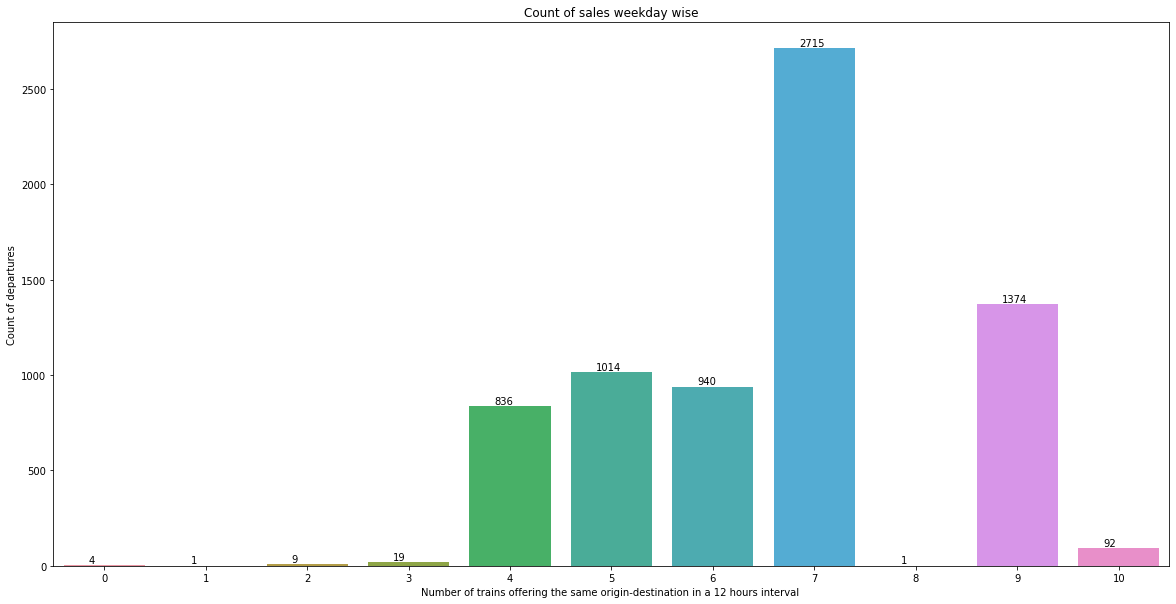

In [16]:
plt.figure(figsize = (20, 10))
plt.title('Count of sales weekday wise')
ax=sns.countplot(x = 'od_number_of_similar_12_hours', data = df)
plt.xlabel('Number of trains offering the same origin-destination in a 12 hours interval ')
plt.ylabel('Count of departures')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

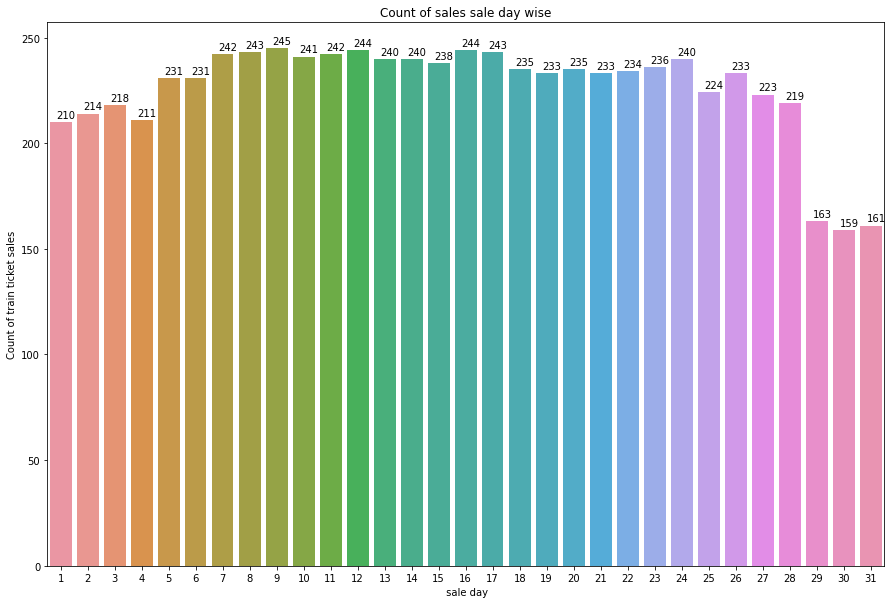

In [17]:
plt.figure(figsize = (15, 10))
plt.title('Count of sales sale day wise')
ax=sns.countplot(x = 'sale_day', data = df)
plt.xlabel(' sale day')
plt.ylabel('Count of train ticket sales')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

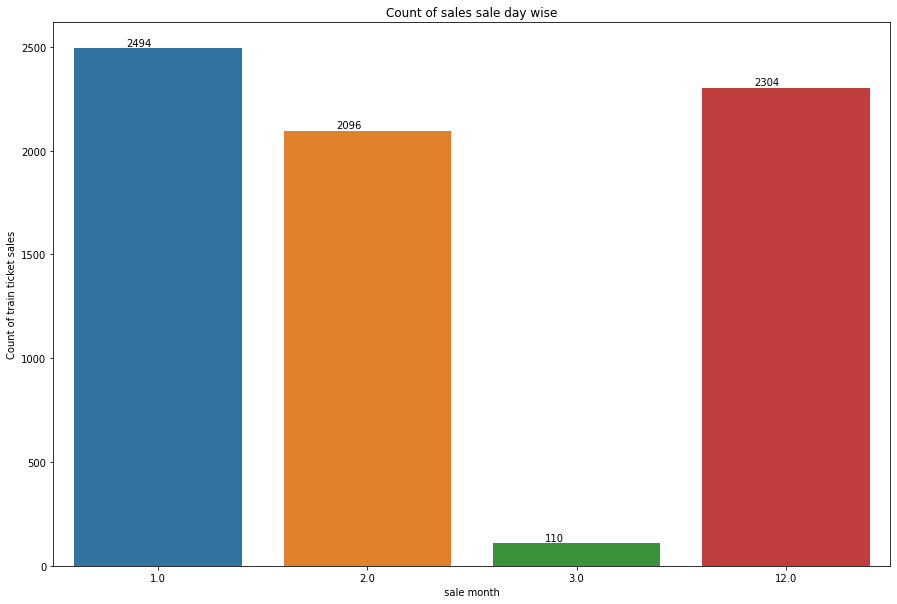

In [18]:
plt.figure(figsize = (15, 10))
plt.title('Count of sales sale day wise')
ax=sns.countplot(x = 'sale_month', data = df)
plt.xlabel(' sale month ')
plt.ylabel('Count of train ticket sales')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

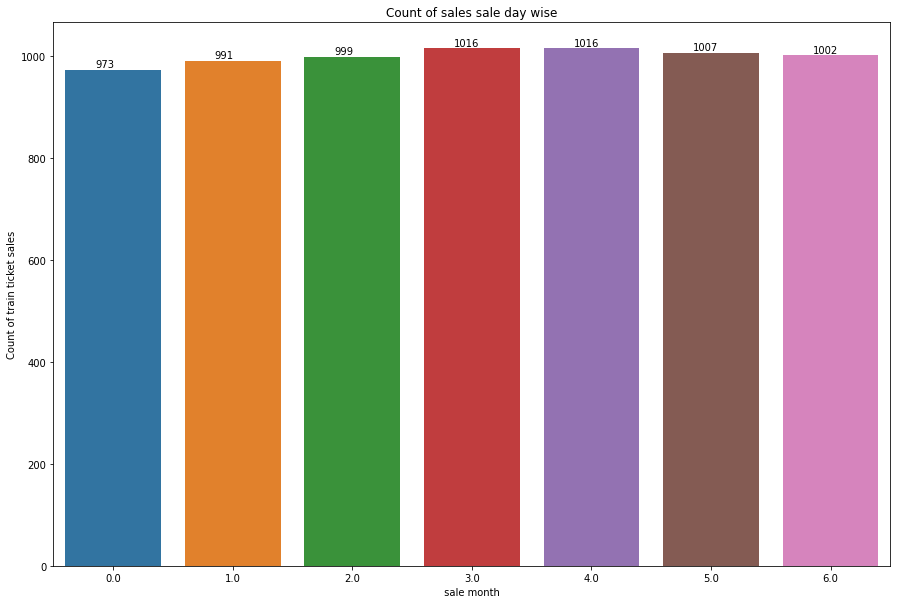

In [19]:
plt.figure(figsize = (15, 10))
plt.title('Count of sales sale day wise')
ax=sns.countplot(x = 'sale_week', data = df)
plt.xlabel(' sale month ')
plt.ylabel('Count of train ticket sales')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

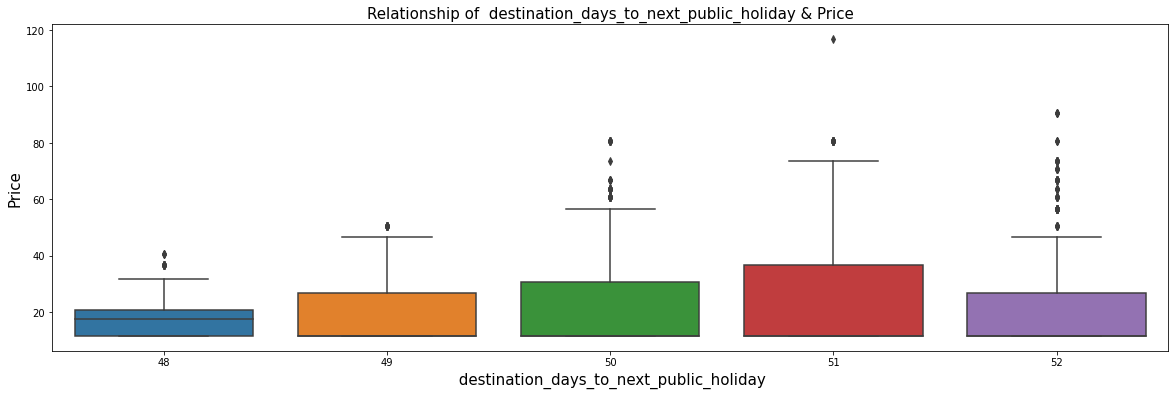

In [20]:
plt.figure(figsize=(20, 6))
sns.boxplot(x='destination_days_to_next_public_holiday', y='price', data=df)
plt.title('Relationship of  destination_days_to_next_public_holiday & Price', fontsize=15)
plt.xlabel(' destination_days_to_next_public_holiday', fontsize=15)
plt.ylabel('Price', fontsize=15)

plt.show()

In [ ]:


plt.figure(figsize=(40, 20))


sns.set_theme(style="whitegrid", palette="muted")



# Draw a categorical scatterplot to show each observation
ax = sns.swarmplot(data=df, x="demand", y="price", hue="destination_current_school_holiday")
ax.set(ylabel="")

plt.show()

In [ ]:
num_cols = df._get_numeric_data().columns
col_cat=list(set(df.columns)-set(num_cols))
print(num_cols)
print(col_cat)

In [ ]:
df['destination_current_school_holiday']

In [ ]:
df.demand.describe()

In [ ]:
sns.distplot(df.demand, kde=False, rug=True)


In [ ]:

#@title

fig=plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),center=True)
fig.savefig('multivariateanalysis.png', transparent=False)

In [ ]:
df_clean=df
df_clean['date_time'] = pd.to_datetime(df_clean['departure_date'])
df_clean['day'] = df_clean['date_time'].apply(lambda x: x.strftime('%Y-%m-%d'))
df_clean['hour'] = df_clean['date_time'].apply(lambda x: x.hour)
df_clean['day_name'] = df_clean['date_time'].apply(lambda y: y.dayofweek)
df_clean['week'] = df_clean['date_time'].apply(lambda y: y.week)
df_clean['year'] = df_clean['date_time'].apply(lambda y: y.year)

In [ ]:
df_clean['date_time_sale'] = pd.to_datetime(df_clean['sale_date'])
df_clean['day_sale'] = df_clean['date_time_sale'].apply(lambda x: x.strftime('%Y-%m-%d'))
df_clean['hour_sale'] = df_clean['date_time_sale'].apply(lambda x: x.hour)
df_clean['day_name_sale'] = df_clean['date_time_sale'].apply(lambda y: y.dayofweek)
df_clean['week_sale'] = df_clean['date_time_sale'].apply(lambda y: y.week)
df_clean['year_sale'] = df_clean['date_time_sale'].apply(lambda y: y.year)

In [ ]:
df_clean.columns

In [ ]:
df['index']=df.index

In [ ]:
df_clean.head(200)

In [ ]:

plt.figure(figsize=(40, 6)) 
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='small')

demand_by_hour = df_clean[['index','hour','day_name']].groupby(['day_name','hour']).count() 
demand_by_hour = demand_by_hour.reset_index()

demand_by_hour['hour_str'] = demand_by_hour.hour.map(str)
demand_by_hour['hour_str'] = demand_by_hour['hour_str'].str.zfill(2)

demand_by_hour['dow_h'] = demand_by_hour.day_name.map(str)+'-'+demand_by_hour.hour_str
sns.lineplot(x = 'dow_h',y = 'index', data=demand_by_hour)

In [ ]:
df_clean['day']

In [ ]:
plt.figure(figsize=(40, 6)) 
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='small')
plt.gca().xaxis.grid(True)


demand_by_day = df_clean[['day','demand','index']].groupby(['day']).sum() 
demand_by_day = demand_by_day.reset_index()
sns.lineplot(x = 'day',y = 'demand', data=demand_by_day)

In [ ]:
plt.figure(figsize=(40, 6)) 
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='small')
plt.gca().xaxis.grid(True)


demand_by_day = df_clean[['day_sale','demand','index']].groupby(['day_sale']).mean() #makes sense
demand_by_day = demand_by_day.reset_index()
sns.lineplot(x = 'day_sale',y = 'demand', data=demand_by_day)

In [ ]:
plt.figure(figsize=(40, 6)) 
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='small')
plt.gca().xaxis.grid(True)


demand_by_day = df_clean[['od_travel_time_minutes','demand','index']].groupby(['od_travel_time_minutes']).sum() #makes sense
demand_by_day = demand_by_day.reset_index()
sns.lineplot(x = 'od_travel_time_minutes',y = 'demand', data=demand_by_day)

In [ ]:
plt.figure(figsize=(40, 6)) 
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='small')
plt.gca().xaxis.grid(True)


demand_by_day = df_clean[['sale_day_x','demand','index']].groupby(['sale_day_x']).mean()#makes sense
demand_by_day = demand_by_day.reset_index()
sns.lineplot(x = 'sale_day_x',y = 'demand', data=demand_by_day)

In [ ]:
df_clean['price'].max()

In [ ]:
plt.figure(figsize=(40, 6)) 
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='small')
plt.gca().xaxis.grid(True)


demand_by_day = df_clean[['price','demand','index']].groupby(['price']).sum() #makes sense
demand_by_day = demand_by_day.reset_index()
sns.lineplot(x = 'price',y = 'demand', data=demand_by_day)

In [ ]:
plt.figure(figsize=(40, 6)) 
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='small')
plt.gca().xaxis.grid(True)


demand_by_day = df_clean[['od_number_of_similar_2_hours','demand','index','day_sale']].groupby(['od_number_of_similar_2_hours','day_sale']).sum() #makes sense
demand_by_day = demand_by_day.reset_index()
sns.lineplot(x = 'od_number_of_similar_2_hours',y = 'demand', data=demand_by_day)

In [ ]:
plt.figure(figsize=(40, 6)) 
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='small')
plt.gca().xaxis.grid(True)

demand_by_day = df_clean[['sale_day_x','demand','index','price']].groupby(['sale_day_x','price']).mean()#kind a makes sense
demand_by_day = demand_by_day.reset_index()
sns.lineplot(x = 'sale_day_x',y = 'price', data=demand_by_day)

In [ ]:
plt.figure(figsize=(40, 6)) 
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='small')
plt.gca().xaxis.grid(True)

demand_by_day = df_clean[['origin_days_to_next_school_holiday','demand','index','price']].groupby(['origin_days_to_next_school_holiday']).mean()#kind a makes sense
demand_by_day = demand_by_day.reset_index()
sns.lineplot(x = 'origin_days_to_next_school_holiday',y = 'demand', data=demand_by_day)



In [ ]:
plt.figure(figsize=(40, 6)) 
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='small')
plt.gca().xaxis.grid(True)

demand_by_day = df_clean[['origin_days_to_next_school_holiday','demand','index','price']].groupby(['origin_days_to_next_school_holiday','price']).mean()#kind a makes sense
demand_by_day = demand_by_day.reset_index()
sns.lineplot(x = 'origin_days_to_next_school_holiday',y = 'price', data=demand_by_day)



In [ ]:
plt.figure(figsize=(40, 6)) 
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='small')
plt.gca().xaxis.grid(True)

demand_by_day = df_clean[['destination_days_to_next_public_holiday','demand','index','price']].groupby(['destination_days_to_next_public_holiday','price']).sum()#kind a makes sense
demand_by_day = demand_by_day.reset_index()
sns.lineplot(x = 'destination_days_to_next_public_holiday',y = 'price', data=demand_by_day)



In [ ]:
plt.figure(figsize=(40, 6)) 
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='small')
plt.gca().xaxis.grid(True)

demand_by_day = df_clean[['destination_days_to_next_public_holiday','demand','index','price']].groupby(['destination_days_to_next_public_holiday']).sum()#kind a makes sense
demand_by_day = demand_by_day.reset_index()
sns.lineplot(x = 'destination_days_to_next_public_holiday',y = 'demand', data=demand_by_day)



In [ ]:
df.columns

In [ ]:
df[df["destination_current_public_holiday"]==1].count()

In [ ]:
df[df["origin_current_public_holiday"]==1].count()

In [ ]:

df[df["origin_days_to_next_school_holiday"]].count()


In [ ]:
plt.figure(figsize=(40, 40)) 


sns.set_theme(style="whitegrid", palette="muted")

# Draw a categorical scatterplot to show each observation
ax = sns.swarmplot(data=df, x="sale_day_x", y="demand", hue="destination_current_public_holiday")
ax.set(ylabel="")

In [ ]:
#très moyen 
fig = plt.figure(figsize=(10,5))
ax = fig.subplots(1,1)
ax.scatter(df_clean['price'], df_clean['demand'])
plt.title("Demand vs Price")
plt.ylabel("Demand")
plt.xlabel("Price");

In [ ]:
#@title

plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt


#Pie plots 
fig = plt.figure(figsize=(16, 8))

for col in col_cat:
    ax=px.pie(df, names= col ,template= "plotly_dark",title=col,hole=0.7)
    ax.show()
 
fig.savefig('catdata.png', transparent=True)
plt.show()